In [17]:
from poloniex import Poloniex
from tusp import string2ts, ts2string
import json
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline

polo = Poloniex()

# historyData es una lista de diccionarios python
historyData = polo.returnChartData(currencyPair="BTC_XRP",
                     start=string2ts("2017-04-01 00:00:00"),
                     end=string2ts("2017-05-01 00:00:00"),
                     period=3600*4)

# Guardando los datos como lista de diccionarios en un archivo de texto
# esto permite acceder a ellos y trabajar como data frame offline
with open("XMR_data.out","w") as f:
    json.dump(historyData,f)
    
with open("XMR_data.out") as f:
    historyData = json.load(f)
    #print data

# convirtiendo datos en data frame
df = pd.DataFrame(historyData)

#  convirtiendo string a float o int
df["close"] =pd.to_numeric(df['close'])
df["open"] =pd.to_numeric(df['open'])
df["low"] =pd.to_numeric(df['high'])
df["volume"] =pd.to_numeric(df['volume'])
df["date"] = pd.to_datetime(df["date"].apply(ts2string))

# seleccionando la columna de fecha como indice
df = df.set_index("date")

# examinando las primeras filas
df.head()

,close,high,low,open,quoteVolume,volume,weightedAverage
date,,,,,,,
2017-04-01 03:00:00,0.000020,1.986e-5,0.000020,0.000019,134235924.15894,2532.036149,1.886e-5
2017-04-01 07:00:00,0.000020,2.032e-5,0.000020,0.000020,115624377.35027,2302.787223,1.991e-5
2017-04-01 11:00:00,0.000021,2.094e-5,0.000021,0.000020,100689803.51558,2059.077641,2.044e-5
2017-04-01 15:00:00,0.000020,2.145e-5,0.000021,0.000021,152432948.12428,3205.041012,2.102e-5
2017-04-01 19:00:00,0.000021,2.132e-5,0.000021,0.000020,96724387.045985,1997.452189,2.065e-5


# Calculando retornos, log retornos y sus respectivos acumulados

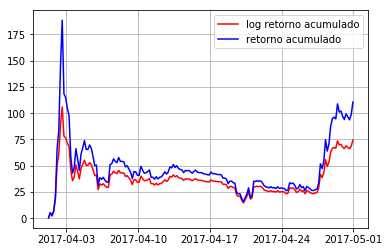

In [18]:
# Calculando retornos relativos
# el 1 se refiere al numero de periodos que se toma para calcular el cambio porcentual
df["retornos relativos"] = df["close"].pct_change(1)

# calculando los log retornos
df["log retornos"] = np.log(df["close"]).diff()

# calculando log retorno acumulado
df["cum_logr"] = df["log retornos"].cumsum()
df["cum_r"] = np.exp(df["cum_logr"]) - 1

plt.plot(df.index,df['cum_logr']*100,'r',label='log retorno acumulado')
plt.plot(df.index,df['cum_r']*100,'b', label='retorno acumulado')
plt.legend()
plt.grid()